<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

This project is focused on exploratory data analysis (EDA). EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to pitfalls and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those beyond this class!

Problems 1 thru 6 use a small dataset on state SAT scores.

Problems 7 thru 12 use a fraction of the Iowa Liquor Sales dataset (described in more detail in question 7).

---

This project includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like stackoverflow that have almost certainly done what you are trying to do.

**Get used to using google for finding code!** You will be using it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt




# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put in dictionary format.

The dictionary format for data will be keys as the column names/headers, and values as the row values for that column.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
sat_filepath = '/Users/Jyots/Desktop/DSI-SF-4-Jyojha/datasets/state_sat_scores/sat_scores.csv'

### 1.2 Make a pandas DataFrame object with the sat dictionary and also with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [3]:
#Padas DataFrame object using sat dictionary

with open(sat_filepath, mode='r') as sat_score_file:
    reader = csv.reader(sat_score_file)
    sat_score_dict ={}
    for row in reader:
        for column, value in enumerate(row):
            #print column, value
            sat_score_dict.setdefault(column, []).append(value)

sat_score_from_dict={}
for key, value in sat_score_dict.items():
    key = value[0]
    sat_score_from_dict[key]= value[1:]

#sat_score_from_dict

state_sat_score_from_dict = pd.DataFrame(sat_score_from_dict)
#print state_sat_score_from_dict
print state_sat_score_from_dict.dtypes


Math      object
Rate      object
State     object
Verbal    object
dtype: object


If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values). 

In [4]:
state_sat_score = pd.read_csv(sat_filepath)
#state_sat_score
print state_sat_score.dtypes
#print state_sat_score

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object


### Since I did not convert the string column values to float in the dictionary, the columns in the above DataFrame "state_sat_score_from_dict" are of type "object(string type)" while in the later case(state_sat_score) the data type of numerical columns are int64.

### 1.3 Look at the first ten rows of the DataFrame and describe what the data appears to be. 

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [5]:
state_sat_score = pd.read_csv(sat_filepath)
state_sat_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
State     52 non-null object
Rate      52 non-null int64
Verbal    52 non-null int64
Math      52 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.7+ KB


In [6]:
state_sat_score.shape

(52, 4)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

### Data Dictionary_State SAT Score

#### There are total 52 rows.
#### There are total 4 columns.

### The columns are described below:
#### State     52 non-null object
##### This column is a series of USA states from where the data has been collected.
#### Rate      52 non-null int64
##### This column is a series of Rate of Participation for each state.
#### Verbal    52 non-null int64
##### This column is a series of Verbal score for each state.
#### Math      52 non-null int64
##### This column is a series of Math score for each state.



<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

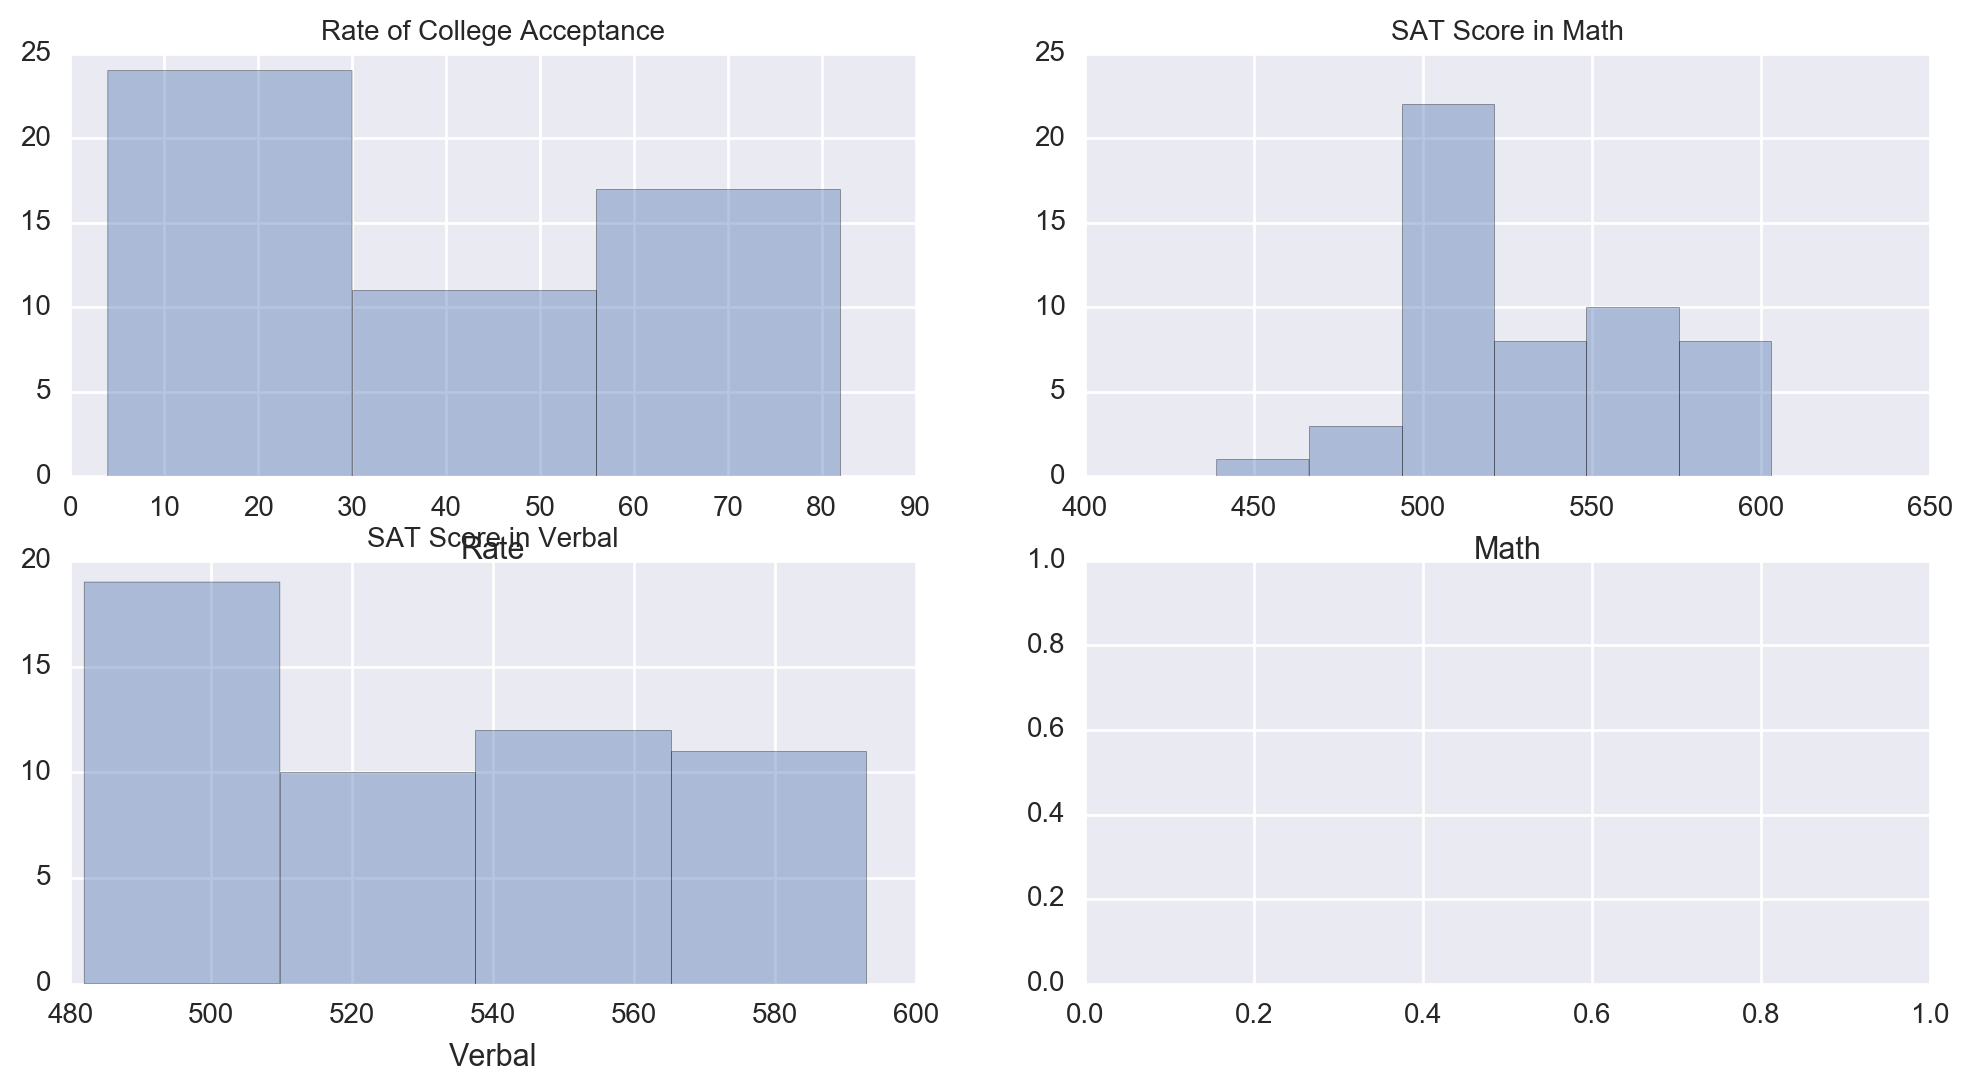

In [7]:
fig, axis_array = plt.subplots(2,2, figsize=(12,6)) # figure with one row and 2 columns within fig. Subplots
axis1 =axis_array[0][0] 
axis2 =axis_array[0][1]
axis3 =axis_array[1][0] 
axis4 =axis_array[1][1]


axis1 = sns.distplot(state_sat_score.Rate,kde = False, ax=axis1)
axis2 = sns.distplot(state_sat_score.Math,kde =False, ax=axis2)
axis3 = sns.distplot(state_sat_score.Verbal,kde=False, ax=axis3)
#axis4 = sns.distplot(state_sat_score.Math, ax=axis4)

axis1.set_title('Rate of College Acceptance',fontsize=10)

axis2.set_title('SAT Score in Math', fontsize=10)
axis3.set_title('SAT Score in Verbal', fontsize=10)

plt.show()

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

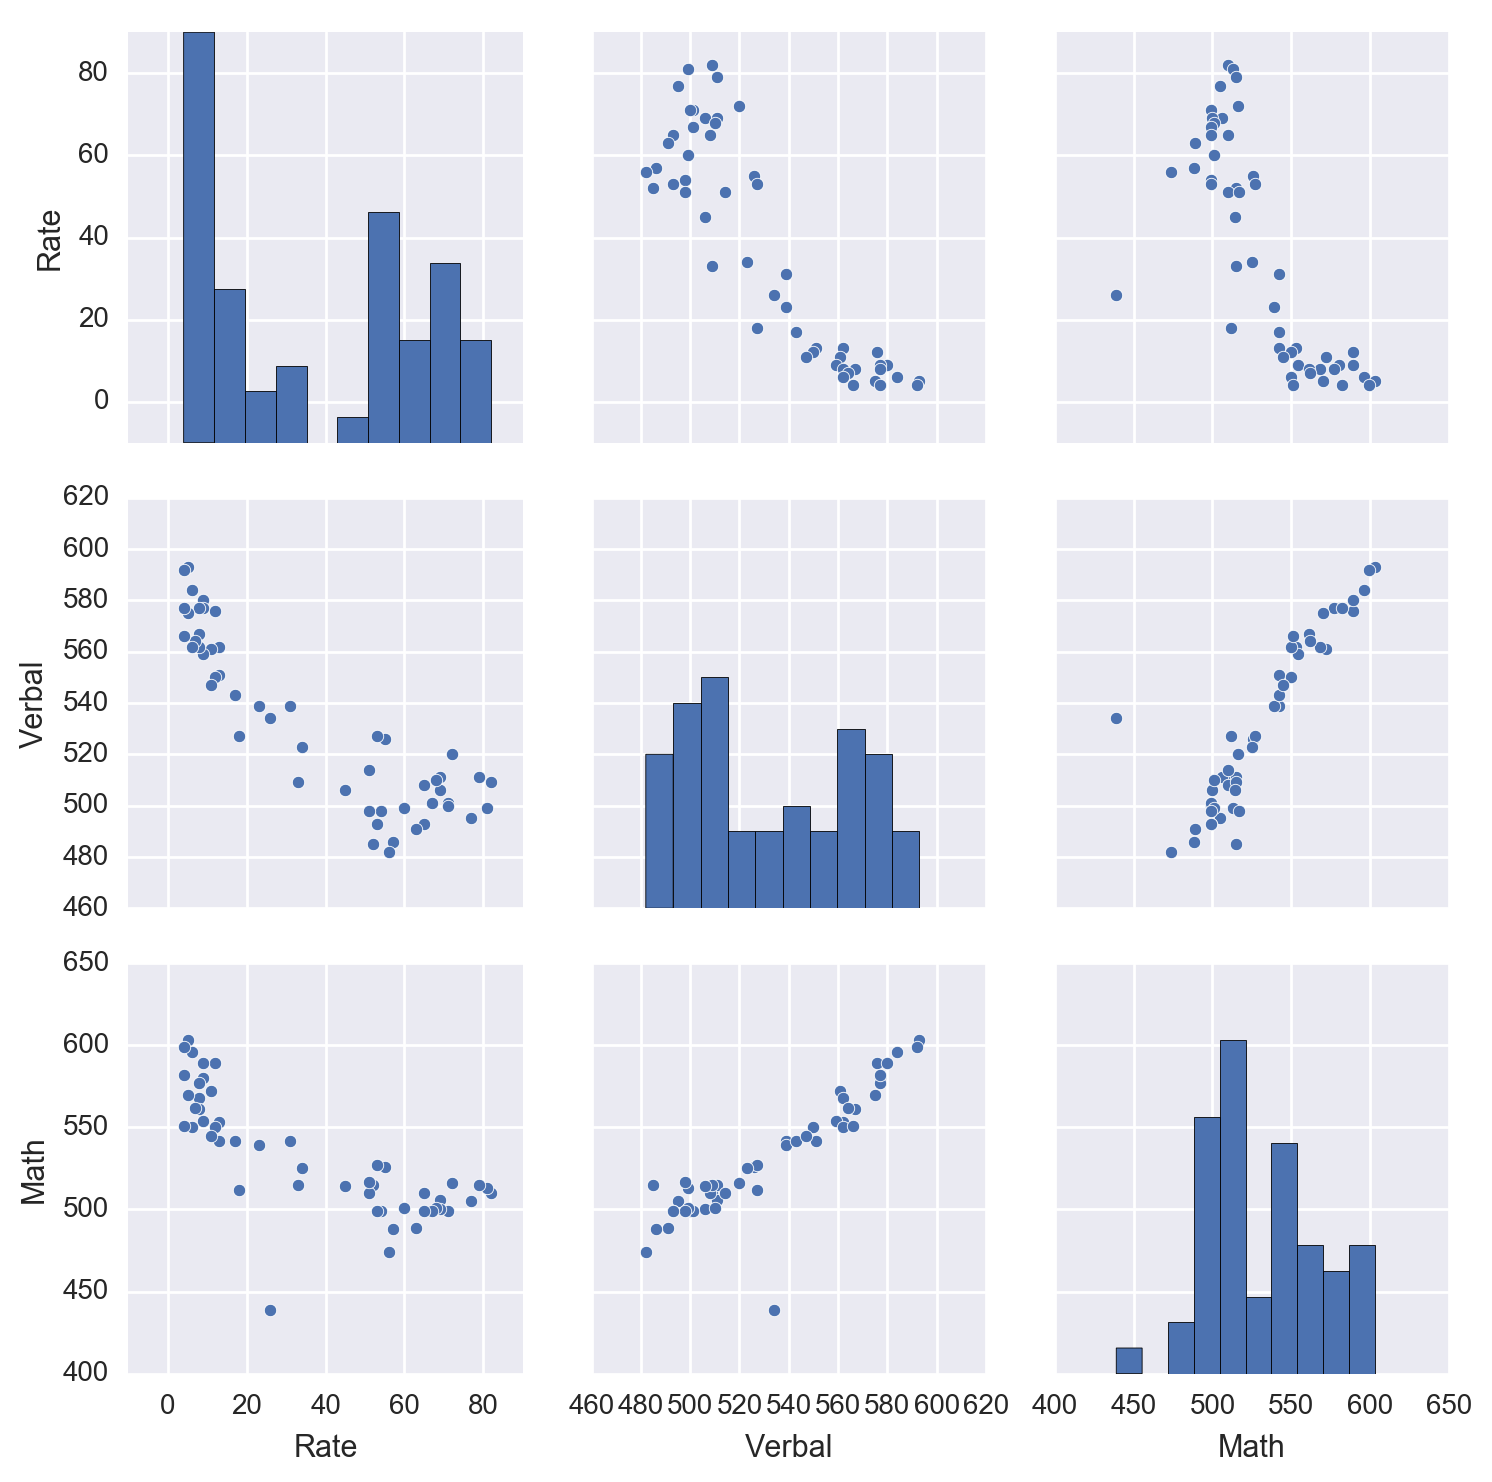

In [8]:
joint_dist = sns.pairplot(state_sat_score, dropna =True)

### Pairplots above show the interaction between the different variables i.e. Math, Verbal, and Rate.
#### As the Rate of participation increases, the Verbal and Math Score start to decline. If Verbal score is high, the Math score is also high and vice versa. States with lower participation Rate might be showing better SAT score results based on the above plots since only the top students might be appearing for the SAT test. States where the Rate of participation is higher, the Verbal and Math scores are lower which indicates that a mixed group of students (preapred/unprepared) appeared for the test.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built in plotting functions for your data. Read the documentation here to overview and understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

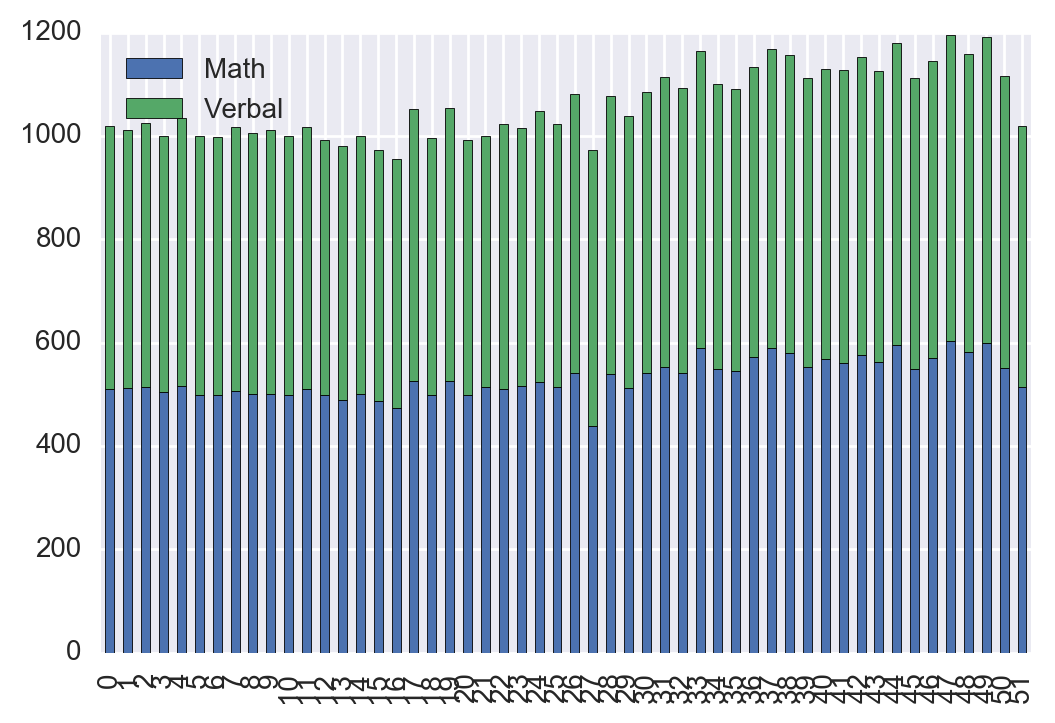

In [9]:
new_state_sat_score = pd.DataFrame(state_sat_score['Math'])
new_state_sat_score['Verbal'] = state_sat_score['Verbal']
new_state_sat_score

new_state_sat_score.plot.bar(stacked=True)

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots (pandas or seaborn)

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

#### A box plot is used to picture the distribution and summary of values while histograms give the variance in the data and scatter plot gives the center and spread. When you use a box and whisker plot you divide the data values into four parts called quartiles. You start by finding the median or middle value. The median splits the data values into halves. Finding the median of each half splits the data values into four parts, the quartiles. Each box on the plot shows the range of values from the median of the lower half of the values at the bottom of the box to the median of the upper half of the values at the top of the box. A line in the middle of the box occurs at the median of all the data values. The whiskers then point to the largest and smallest values in the data.

#### Since the range of values for "Rate" is very small compared to those for "Verbal and Math" score, we would not get a true plot for comparing various data series such as Rate, Verbal, and Math on the same plot if plotted together.



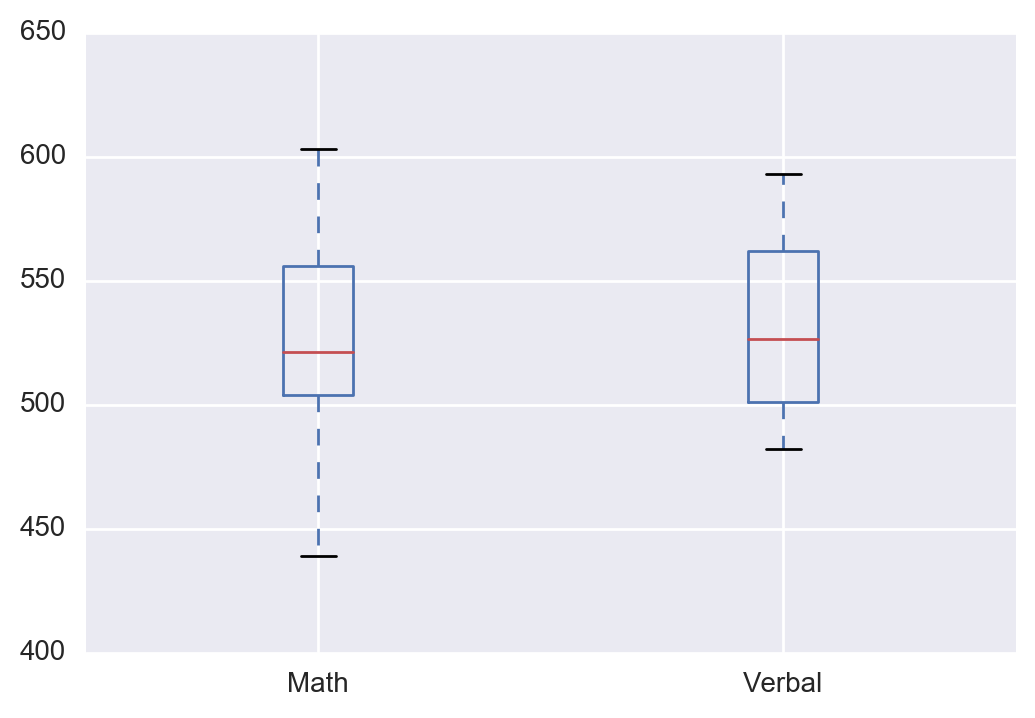

In [10]:
new_state_sat_score.plot.box()

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart (pandas or seaborn)

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


#### I normalized the dataframe such that each column gets normalized with mean of 0 and standard deviation of 1. Once normalized, we get plot Rate, Verbal, and Math score on the same plot for valid comparison.

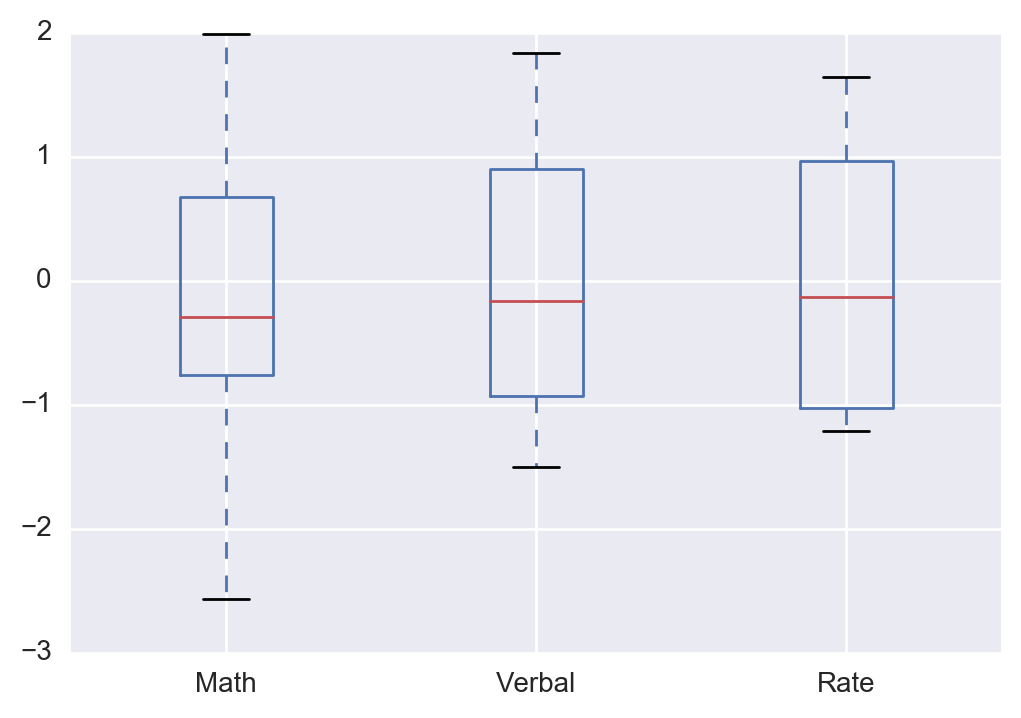

In [11]:
new_state_sat_score_rate = pd.DataFrame(new_state_sat_score)
new_state_sat_score_rate['Rate'] = state_sat_score['Rate']
new_state_sat_score_rate

new_state_sat_score_rate_normed = (new_state_sat_score_rate - new_state_sat_score_rate.mean())/new_state_sat_score_rate.std() 

new_state_sat_score_rate_normed.plot.box()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Recall that masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?



In [12]:
print state_sat_score['Verbal'].mean()


condition1_mask = state_sat_score['Verbal'] > state_sat_score['Verbal'].mean()
#condition1_mask

(state_sat_score.loc[condition1_mask, 'State']).values

532.019230769


array(['CO', 'OH', 'MT', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN',
       'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD',
       'ND', 'MS'], dtype=object)

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [13]:
print state_sat_score['Verbal'].median()

condition2_mask = state_sat_score['Verbal'] > state_sat_score['Verbal'].median()
(state_sat_score.loc[condition2_mask, 'State']).values

526.5


array(['WA', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY',
       'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT',
       'IA', 'SD', 'ND', 'MS'], dtype=object)

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [14]:
state_sat_score['score_diff_vm'] = state_sat_score['Verbal'] - state_sat_score['Math']

state_sat_score.head()

,State,Rate,Verbal,Math,score_diff_vm
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [15]:
state_sat_score['State'].unique()

array(['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE',
       'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI',
       'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM',
       'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA',
       'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All'], dtype=object)

In [16]:
state_sat_score_vh = state_sat_score.sort_values(by = ['score_diff_vm'],ascending =False)
state_sat_score_vh
state_sat_score_highverbal = state_sat_score_vh.head(10)







In [17]:
state_sat_score_highverbal.head(3)

,State,Rate,Verbal,Math,score_diff_vm
27,OH,26,534,439,95
50,MS,4,566,551,15
29,WV,18,527,512,15


In [18]:
state_sat_score_highmath = state_sat_score_vh.tail(10).sort_values(by =['score_diff_vm'], ascending = True)
state_sat_score_highmath['score_diff_vm'] = state_sat_score_highmath['score_diff_vm']* (-1)
state_sat_score_highmath.head(3)

,State,Rate,Verbal,Math,score_diff_vm
21,HI,52,485,515,30
23,CA,51,498,517,19
1,NJ,81,499,513,14


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [19]:
state_sat_score_corr_sumstat = state_sat_score.corr(method='pearson', min_periods=1)
del state_sat_score_corr_sumstat['score_diff_vm']
state_sat_score_corr_sumstat

,Rate,Verbal,Math
Rate,1.000000,-0.886432,-0.773746
Verbal,-0.886432,1.000000,0.899871
Math,-0.773746,0.899871,1.000000
score_diff_vm,-0.101412,0.052600,-0.388219


### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [20]:
state_sat_score_stat = state_sat_score.describe()
del state_sat_score_stat['score_diff_vm']
state_sat_score_stat

,Rate,Verbal,Math
count,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000
std,27.301788,33.236225,36.014975
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,504.000000
50%,33.500000,526.500000,521.000000
75%,63.500000,562.000000,555.750000
max,82.000000,593.000000,603.000000


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

#### Covariance centers the data while correlation not only centers the data but also scales using standard deviation. 

#### Correlation is a scaled version of covariance. In order to convert the covariance matrix to correlation matrix,extract the variances from the diagonal elements of the covariance matrix. Then, invert the matrix to form the diagonal matrix with diagonal elements that are the reciprocals of the standard deviations.

#### Hence, correlation is always between -1 to +1 and can be used to compare multi-range data since it normalizes the data.



In [21]:
state_sat_score_cov_sumstat = state_sat_score.cov(min_periods=None)
del state_sat_score_cov_sumstat['score_diff_vm']
#state_sat_score_cov_sumstat = state_sat_score_cov_sumstat.drop('score_diff_vm',axis=0)
state_sat_score_cov_sumstat

,Rate,Verbal,Math
Rate,745.387632,-804.355958,-760.803922
Verbal,-804.355958,1104.646682,1077.147059
Math,-760.803922,1077.147059,1297.078431
score_diff_vm,-43.552036,27.499623,-219.931373


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Load Iowa Liquor Sales dataset

---

The state of Iowa provides many data sets on their website, including [this dataset](https://www.dropbox.com/sh/pf5n5sgfgiri3i8/AACkaMeL_i_WgZ00rpxOOcysa?dl=0) which contains transactions for all stores that have a class E liquor license. You can choose one of the following two scenarios.

The data can also be found [directly on their website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy), which allows you to explore it graphically and download it (though it doesn't work very well).

NOTE: Some of you may have computer issues with the full dataset. In this case, feel free to use [this 10% dataset version of Iowa liquor sales](https://drive.google.com/file/d/0Bx2SHQGVqWaseDB4QU9ZSVFDY2M/view?usp=sharing). You may want to use it anyway to test and prototype your code since it will be faster, before running it on the full dataset.


In [22]:
iowa_file = '/Users/Jyots/Desktop/DSI-SF-4-Jyojha/datasets/iowa_liquor/Iowa_Liquor_sales_sample_10pct.csv'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 7.1 Do an initial overview of the data

---

At the very least describe the columns/variables and the datatypes. 

In [ ]:
iowa_liquor_sale = pd.read_csv(iowa_file)


In [24]:
iowa_liquor_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 18 columns):
Date                     270955 non-null object
Store Number             270955 non-null int64
City                     270955 non-null object
Zip Code                 270955 non-null object
County Number            269878 non-null float64
County                   269878 non-null object
Category                 270887 non-null float64
Category Name            270323 non-null object
Vendor Number            270955 non-null int64
Item Number              270955 non-null int64
Item Description         270955 non-null object
Bottle Volume (ml)       270955 non-null int64
State Bottle Cost        270955 non-null object
State Bottle Retail      270955 non-null object
Bottles Sold             270955 non-null int64
Sale (Dollars)           270955 non-null object
Volume Sold (Liters)     270955 non-null float64
Volume Sold (Gallons)    270955 non-null float64
dtypes: float64(4), int64(

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Clean the liquor dataset

---

### 8.1 Identify columns that you will need to convert and clean. Where and how is the data corrupted?

Don't worry about converting the date column to a pandas/numpy "datetime" datatype, unless you want to (not required for these problems and is a challenging thing to work with in its own right.)

#### The columns that immediately need to be cleaned are : State Bottle Cost, State Bottle Retail, Sale (Dollars) , we need to remove the
#### dollar sign in them and convert to float.

#### Additionally, I made the "City" column lower case and capitalized the first letter of each city. I also converted the "Date" column to datetime element and created separate columns for Sale_Year, and Sale_Month.

In [25]:
iowa_liquor_sale.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34
3,02/03/2016,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.5,2.77
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.0,5.55


In [26]:
iowa_liquor_sale.describe

<bound method DataFrame.describe of               Date  Store Number             City Zip Code  County Number  \
0       11/04/2015          3717           SUMNER    50674            9.0   
1       03/02/2016          2614        DAVENPORT    52807           82.0   
2       02/11/2016          2106      CEDAR FALLS    50613            7.0   
3       02/03/2016          2501             AMES    50010           85.0   
4       08/18/2015          3654          BELMOND    50421           99.0   
5       04/20/2015          2569     CEDAR RAPIDS    52402           57.0   
6       08/05/2015          2596          OTTUMWA    52501           90.0   
7       06/25/2015          3456       CLEAR LAKE    50428           17.0   
8       01/04/2016          4757        BONDURANT    50035           77.0   
9       11/10/2015          4346       SHELLSBURG    52332            6.0   
10      09/28/2015          2648  WEST DES MOINES    50265           77.0   
11      10/28/2015          2600        

In [27]:
# Removes the $ sign

def remove_char(x):
    if type(x) == str:
        try:
            return float(x.strip("$"))
        except:
            return np.nan
    
        
iowa_liquor_sale["State Bottle Cost"] = iowa_liquor_sale["State Bottle Cost"].map(remove_char)
iowa_liquor_sale["State Bottle Retail"] = iowa_liquor_sale["State Bottle Retail"].map(remove_char)
iowa_liquor_sale["Sale (Dollars)"] = iowa_liquor_sale["Sale (Dollars)"].map(remove_char)
iowa_liquor_sale_ver1 = iowa_liquor_sale
iowa_liquor_sale_ver1.tail()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
270950,12/22/2015,4057,DES MOINES,50316,77.0,Polk,1022100.0,TEQUILA,410,88291,Patron Tequila Silver Mini,300,20.30,30.45,4,121.80,1.20,0.32
270951,11/04/2015,5151,IDA GROVE,51445,47.0,Ida,1011200.0,STRAIGHT BOURBON WHISKIES,259,17956,Evan Williams Str Bourbon,750,7.47,11.21,3,33.63,2.25,0.59
270952,10/20/2015,5152,WATERLOO,50702,7.0,Black Hawk,1011300.0,TENNESSEE WHISKIES,85,26826,Jack Daniels Old #7 Black Lbl,750,15.07,22.61,6,135.66,4.50,1.19
270953,11/20/2015,3562,WEST BURLINGTON,52655,29.0,Des Moines,1082900.0,MISC. IMPORTED CORDIALS & LIQUEURS,192,65258,Jagermeister Liqueur,1750,26.05,39.08,6,234.48,10.50,2.77
270954,01/27/2015,4446,URBANDALE,50322,77.0,Polk,1031080.0,VODKA 80 PROOF,260,37993,Smirnoff Vodka 80 Prf,200,2.75,4.13,8,33.04,1.60,0.42


In [28]:
iowa_liquor_sale_ver1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 18 columns):
Date                     270955 non-null object
Store Number             270955 non-null int64
City                     270955 non-null object
Zip Code                 270955 non-null object
County Number            269878 non-null float64
County                   269878 non-null object
Category                 270887 non-null float64
Category Name            270323 non-null object
Vendor Number            270955 non-null int64
Item Number              270955 non-null int64
Item Description         270955 non-null object
Bottle Volume (ml)       270955 non-null int64
State Bottle Cost        270955 non-null float64
State Bottle Retail      270955 non-null float64
Bottles Sold             270955 non-null int64
Sale (Dollars)           270955 non-null float64
Volume Sold (Liters)     270955 non-null float64
Volume Sold (Gallons)    270955 non-null float64
dtypes: float64(7), int

In [29]:
iowa_liquor_sale_ver1['Date'] = pd.to_datetime(iowa_liquor_sale_ver1['Date'],format="%m/%d/%Y")


In [30]:
# Formats the City Names

iowa_liquor_sale_ver1['City'] = iowa_liquor_sale_ver1['City'].map(lambda x :x.lower())
iowa_liquor_sale_ver1['City'] = iowa_liquor_sale_ver1['City'].map(lambda x :x.capitalize())
iowa_liquor_sale_ver1.tail()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
270950,2015-12-22,4057,Des moines,50316,77.0,Polk,1022100.0,TEQUILA,410,88291,Patron Tequila Silver Mini,300,20.30,30.45,4,121.80,1.20,0.32
270951,2015-11-04,5151,Ida grove,51445,47.0,Ida,1011200.0,STRAIGHT BOURBON WHISKIES,259,17956,Evan Williams Str Bourbon,750,7.47,11.21,3,33.63,2.25,0.59
270952,2015-10-20,5152,Waterloo,50702,7.0,Black Hawk,1011300.0,TENNESSEE WHISKIES,85,26826,Jack Daniels Old #7 Black Lbl,750,15.07,22.61,6,135.66,4.50,1.19
270953,2015-11-20,3562,West burlington,52655,29.0,Des Moines,1082900.0,MISC. IMPORTED CORDIALS & LIQUEURS,192,65258,Jagermeister Liqueur,1750,26.05,39.08,6,234.48,10.50,2.77
270954,2015-01-27,4446,Urbandale,50322,77.0,Polk,1031080.0,VODKA 80 PROOF,260,37993,Smirnoff Vodka 80 Prf,200,2.75,4.13,8,33.04,1.60,0.42


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 8.2 Perform more extensive cleaning of the dataset

Cleaning of data can mean a lot more than just fixing strings and numbers in columns. There are often logical errors with data, useless or nonsensical categories, redundancy of information, outliers, and many more problems.

This dataset has problems beyond just fixing the types of columns. Though resolving them may not be required for EDA and analysis, if you want experience with "deeper" cleaning of data this is a great dataset to start practicing with.

Keep in mind that some types of "data cleaning" is subjective: it's not always a cut-and-dry conversion of type or removal of null values. Subjectivity when dealing with data is just a fact of life for a data scientist. This isn't a kind of programming where things are just right or wrong.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 9. Filter/adjust the store data

---

Some stores may have opened or closed in 2015. These stores will have incorrect yearly summary statistics since they were not open the full year. We need to filter them out or find another way to deal with the inconsistent numbers of months across stores.

It is up to you how you want to deal with this problem.

1. Investigate problematic stores.
2. Decide on an approach to handle missing data for stores not open for the full 2015 year. Do you impute? Remove the stores? Something else?
3. Implement your plan.
4. Briefly report on what you did and why.


In [32]:
len(iowa_liquor_sale_ver1['Store Number'].unique())

1400

In [33]:
#adds the Sale_Month column

iowa_liquor_sale_ver1.insert(2,'Sale_Month',iowa_liquor_sale_ver1['Date'].map(lambda x:x.month))




In [34]:
#adds the Sale_Year column

iowa_liquor_sale_ver1.insert(3,'Sale_Year',iowa_liquor_sale_ver1['Date'].map(lambda x:x.year))
iowa_liquor_sale_ver1.head()



,Date,Store Number,Sale_Month,Sale_Year,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,2015-11-04,3717,11,2015,Sumner,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.0,2.38
1,2016-03-02,2614,3,2016,Davenport,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,13.75,20.63,2,41.26,1.5,0.40
2,2016-02-11,2106,2,2016,Cedar falls,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,12.59,18.89,24,453.36,24.0,6.34
3,2016-02-03,2501,2,2016,Ames,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,9.50,14.25,6,85.50,10.5,2.77
4,2015-08-18,3654,8,2015,Belmond,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,7.20,10.80,12,129.60,21.0,5.55


In [35]:
iowa_liquor_sale_ver1

,Date,Store Number,Sale_Month,Sale_Year,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,2015-11-04,3717,11,2015,Sumner,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.00,2.38
1,2016-03-02,2614,3,2016,Davenport,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,13.75,20.63,2,41.26,1.50,0.40
2,2016-02-11,2106,2,2016,Cedar falls,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,12.59,18.89,24,453.36,24.00,6.34
3,2016-02-03,2501,2,2016,Ames,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,9.50,14.25,6,85.50,10.50,2.77
4,2015-08-18,3654,8,2015,Belmond,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,7.20,10.80,12,129.60,21.00,5.55
5,2015-04-20,2569,4,2015,Cedar rapids,52402,57.0,Linn,1041100.0,AMERICAN DRY GINS,205,31473,New Amsterdam Gin,1750,13.32,19.98,6,119.88,10.50,2.77
6,2015-08-05,2596,8,2015,Ottumwa,52501,90.0,Wapello,1051010.0,AMERICAN GRAPE BRANDIES,85,52806,Korbel Brandy,750,6.66,9.99,3,29.97,2.25,0.59
7,2015-06-25,3456,6,2015,Clear lake,50428,17.0,Cerro Gordo,1012100.0,CANADIAN WHISKIES,65,10628,Canadian Club Whisky,1750,15.75,23.63,2,47.26,3.50,0.92
8,2016-01-04,4757,1,2016,Bondurant,50035,77.0,Polk,1032080.0,IMPORTED VODKA,370,34006,Absolut Swedish Vodka 80 Prf,750,11.49,17.24,4,68.96,3.00,0.79
9,2015-11-10,4346,11,2015,Shellsburg,52332,6.0,Benton,1081315.0,CINNAMON SCHNAPPS,65,82610,Dekuyper Hot Damn!,1000,7.62,11.43,2,22.86,2.00,0.53


### My assumption to pick the store for year 2015:
#### If a store has made at least one sale every month for months ranging from 1-12, the rows corresponding to it remain in the dataset.
#### The rest of the rows are dropped.

In [36]:
#Creates a dictionary for store numbers and their sale_months in 2015

iowa_liquor_sale_ver2 = iowa_liquor_sale_ver1.sort_values(by = "Date",ascending = True)
iowa_liquor_sale_ver2 = iowa_liquor_sale_ver2.groupby(["Sale_Year", "Store Number"])["Sale_Month"].unique()
iowa_liquor_sale_ver2 = pd.DataFrame(iowa_liquor_sale_ver2[2015])
iowa_liquor_sale_ver2 = iowa_liquor_sale_ver2.reset_index()
iowa_liquor_sale_ver2


storenum_valid ={}  #stores the data for stores numbers that validates the above assumptions
storenum_invalid ={} #stores the data for stores numbers that do not meet the above assumptions

for i in range(iowa_liquor_sale_ver2.shape[0]):
    year_sale_length = len(iowa_liquor_sale_ver2.loc[i,'Sale_Month'])
    if year_sale_length == 12:
        storenum_valid[iowa_liquor_sale_ver2.loc[i,'Store Number']] = year_sale_length
    else:
        storenum_invalid[iowa_liquor_sale_ver2.loc[i,'Store Number']] = year_sale_length
        
#print storenum_valid.keys()
#print storenum_invalid 

#populates the Store Number column with 0 for those stores that do not meet the assumption
for i in range(iowa_liquor_sale_ver1.shape[0]):
        if iowa_liquor_sale_ver1.loc[i,'Store Number'] in storenum_invalid.keys():
            iowa_liquor_sale_ver1.loc[i,'Store Number'] = 0

#drops the rows where store numbers are 0            
chk_mask1 = iowa_liquor_sale_ver1['Store Number'] != 0
iowa_liquor_sale_ver1 = iowa_liquor_sale_ver1[chk_mask1]

#chk_mask2 = iowa_liquor_sale_ver1['Sale_Year'] == 2015
        
iowa_liquor_sale_ver1









    












,Date,Store Number,Sale_Month,Sale_Year,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,2015-11-04,3717,11,2015,Sumner,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.00,2.38
1,2016-03-02,2614,3,2016,Davenport,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,13.75,20.63,2,41.26,1.50,0.40
2,2016-02-11,2106,2,2016,Cedar falls,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,12.59,18.89,24,453.36,24.00,6.34
3,2016-02-03,2501,2,2016,Ames,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,9.50,14.25,6,85.50,10.50,2.77
4,2015-08-18,3654,8,2015,Belmond,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,7.20,10.80,12,129.60,21.00,5.55
5,2015-04-20,2569,4,2015,Cedar rapids,52402,57.0,Linn,1041100.0,AMERICAN DRY GINS,205,31473,New Amsterdam Gin,1750,13.32,19.98,6,119.88,10.50,2.77
6,2015-08-05,2596,8,2015,Ottumwa,52501,90.0,Wapello,1051010.0,AMERICAN GRAPE BRANDIES,85,52806,Korbel Brandy,750,6.66,9.99,3,29.97,2.25,0.59
7,2015-06-25,3456,6,2015,Clear lake,50428,17.0,Cerro Gordo,1012100.0,CANADIAN WHISKIES,65,10628,Canadian Club Whisky,1750,15.75,23.63,2,47.26,3.50,0.92
8,2016-01-04,4757,1,2016,Bondurant,50035,77.0,Polk,1032080.0,IMPORTED VODKA,370,34006,Absolut Swedish Vodka 80 Prf,750,11.49,17.24,4,68.96,3.00,0.79
9,2015-11-10,4346,11,2015,Shellsburg,52332,6.0,Benton,1081315.0,CINNAMON SCHNAPPS,65,82610,Dekuyper Hot Damn!,1000,7.62,11.43,2,22.86,2.00,0.53


In [37]:
iowa_liquor_sale_ver1 = iowa_liquor_sale_ver1.reset_index()
iowa_liquor_sale_ver1.head()


,index,Date,Store Number,Sale_Month,Sale_Year,City,Zip Code,County Number,County,Category,...,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,0,2015-11-04,3717,11,2015,Sumner,50674,9.0,Bremer,1051100.0,...,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.0,2.38
1,1,2016-03-02,2614,3,2016,Davenport,52807,82.0,Scott,1011100.0,...,395,27605,Tin Cup,750,13.75,20.63,2,41.26,1.5,0.40
2,2,2016-02-11,2106,2,2016,Cedar falls,50613,7.0,Black Hawk,1011200.0,...,65,19067,Jim Beam,1000,12.59,18.89,24,453.36,24.0,6.34
3,3,2016-02-03,2501,2,2016,Ames,50010,85.0,Story,1071100.0,...,395,59154,1800 Ultimate Margarita,1750,9.50,14.25,6,85.50,10.5,2.77
4,4,2015-08-18,3654,8,2015,Belmond,50421,99.0,Wright,1031080.0,...,297,35918,Five O'clock Vodka,1750,7.20,10.80,12,129.60,21.0,5.55


In [38]:
iowa_liquor_sale_ver1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243451 entries, 0 to 243450
Data columns (total 21 columns):
index                    243451 non-null int64
Date                     243451 non-null datetime64[ns]
Store Number             243451 non-null int64
Sale_Month               243451 non-null int64
Sale_Year                243451 non-null int64
City                     243451 non-null object
Zip Code                 243451 non-null object
County Number            242401 non-null float64
County                   242401 non-null object
Category                 243386 non-null float64
Category Name            242882 non-null object
Vendor Number            243451 non-null int64
Item Number              243451 non-null int64
Item Description         243451 non-null object
Bottle Volume (ml)       243451 non-null int64
State Bottle Cost        243451 non-null float64
State Bottle Retail      243451 non-null float64
Bottles Sold             243451 non-null int64
Sale (Dollars)       

In [39]:
# <img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 10. Examine liquor profits

#---

#You are a data scientist in residence at the Iowa State tax board.The Iowa State legislature is considering changes 
#in the liquor tax rates and has assigned you to the project.
### 10.1 Calculate yearly liquor sales for each store in 2015.

In [40]:
yearly_liquor_sales_2015 = iowa_liquor_sale_ver1.groupby(['Sale_Year','Store Number'])['Sale (Dollars)'].agg(np.sum)

yearly_liquor_sales_2015 = pd.DataFrame(yearly_liquor_sales_2015[2015])
yearly_liquor_sales_2015 = yearly_liquor_sales_2015.reset_index()
yearly_liquor_sales_2015.head()

,Store Number,Sale (Dollars)
0,2106,146326.22
1,2113,9310.22
2,2130,111871.43
3,2152,7721.08
4,2178,24324.18


### 10.2 Calculate the profit each store is making in 2015.


In [43]:
iowa_liquor_sale_ver1['Cost_Price'] = iowa_liquor_sale_ver1['State Bottle Cost'] * iowa_liquor_sale_ver1['Bottles Sold']
iowa_liquor_sale_ver1

,index,Date,Store Number,Sale_Month,Sale_Year,City,Zip Code,County Number,County,Category,...,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Cost_Price
0,0,2015-11-04,3717,11,2015,Sumner,50674,9.0,Bremer,1051100.0,...,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.00,2.38,54.00
1,1,2016-03-02,2614,3,2016,Davenport,52807,82.0,Scott,1011100.0,...,27605,Tin Cup,750,13.75,20.63,2,41.26,1.50,0.40,27.50
2,2,2016-02-11,2106,2,2016,Cedar falls,50613,7.0,Black Hawk,1011200.0,...,19067,Jim Beam,1000,12.59,18.89,24,453.36,24.00,6.34,302.16
3,3,2016-02-03,2501,2,2016,Ames,50010,85.0,Story,1071100.0,...,59154,1800 Ultimate Margarita,1750,9.50,14.25,6,85.50,10.50,2.77,57.00
4,4,2015-08-18,3654,8,2015,Belmond,50421,99.0,Wright,1031080.0,...,35918,Five O'clock Vodka,1750,7.20,10.80,12,129.60,21.00,5.55,86.40
5,5,2015-04-20,2569,4,2015,Cedar rapids,52402,57.0,Linn,1041100.0,...,31473,New Amsterdam Gin,1750,13.32,19.98,6,119.88,10.50,2.77,79.92
6,6,2015-08-05,2596,8,2015,Ottumwa,52501,90.0,Wapello,1051010.0,...,52806,Korbel Brandy,750,6.66,9.99,3,29.97,2.25,0.59,19.98
7,7,2015-06-25,3456,6,2015,Clear lake,50428,17.0,Cerro Gordo,1012100.0,...,10628,Canadian Club Whisky,1750,15.75,23.63,2,47.26,3.50,0.92,31.50
8,8,2016-01-04,4757,1,2016,Bondurant,50035,77.0,Polk,1032080.0,...,34006,Absolut Swedish Vodka 80 Prf,750,11.49,17.24,4,68.96,3.00,0.79,45.96
9,9,2015-11-10,4346,11,2015,Shellsburg,52332,6.0,Benton,1081315.0,...,82610,Dekuyper Hot Damn!,1000,7.62,11.43,2,22.86,2.00,0.53,15.24


In [44]:
store_2015 = iowa_liquor_sale_ver1.groupby(['Sale_Year','Store Number'])[['Sale (Dollars)','Cost_Price']].agg(np.sum)
store_2015 = store_2015.reset_index()
store_2015 = store_2015[store_2015['Sale_Year'] == 2015]
store_2015['Profit_in_dollars'] = store_2015['Sale (Dollars)'] - store_2015['Cost_Price']
store_2015

,Sale_Year,Store Number,Sale (Dollars),Cost_Price,Profit_in_dollars
0,2015,2106,146326.22,97488.14,48838.08
1,2015,2113,9310.22,6201.18,3109.04
2,2015,2130,111871.43,74546.23,37325.20
3,2015,2152,7721.08,5133.55,2587.53
4,2015,2178,24324.18,16158.48,8165.70
5,2015,2190,121689.06,81071.33,40617.73
6,2015,2191,125093.49,83349.10,41744.39
7,2015,2200,22811.55,15158.08,7653.47
8,2015,2205,24681.39,16437.26,8244.13
9,2015,2228,17462.07,11617.73,5844.34


### 10.3 Investigate which Iowa counties are making the most profit on liquor per gallon in 2015.

In [45]:
countyprofit_2015 = iowa_liquor_sale_ver1.groupby(['Sale_Year','County','Store Number'])[['Sale (Dollars)','Cost_Price','Volume Sold (Gallons)']].agg(np.sum)
countyprofit_2015 = countyprofit_2015.reset_index()
countyprofit_2015 = countyprofit_2015[countyprofit_2015['Sale_Year'] == 2015]
countyprofit_2015['Profitpergal_in_dollars'] = (countyprofit_2015['Sale (Dollars)'] - countyprofit_2015['Cost_Price'])/countyprofit_2015['Volume Sold (Gallons)']
countyprofit_2015 = countyprofit_2015.sort_values(by = 'Profitpergal_in_dollars', ascending = False)
countyprofit_2015.head(10)

,Sale_Year,County,Store Number,Sale (Dollars),Cost_Price,Volume Sold (Gallons),Profitpergal_in_dollars
592,2015,Polk,4669,9427.17,6284.05,36.39,86.373179
708,2015,Scott,9002,37700.52,25126.44,328.17,38.315751
328,2015,Johnson,5009,4052.89,2700.60,42.01,32.189717
406,2015,Linn,4979,31883.49,21252.38,333.73,31.855422
49,2015,Black Hawk,4648,48383.45,32243.38,524.31,30.783449
498,2015,Polk,2248,67682.06,45097.55,743.70,30.367769
627,2015,Pottawattamie,3521,40893.92,27257.43,453.87,30.044925
531,2015,Polk,3698,13544.38,9023.59,152.23,29.697103
677,2015,Scott,3805,38364.56,25568.97,445.74,28.706398
690,2015,Scott,4638,35719.18,23804.05,417.02,28.572083


### 10.4 Create a broader category for liquor type.

Liquor types are pretty granular in this dataset. Create a column that categorizes these types into a smaller amount of categories. The categories you decide on are up to you.

In [47]:
def parse_code(x):
    
    #print x
    try:
        x=x.split()
        if "BRANDIES" in x:
            return "Brandy"
        elif "RUM" in x:
            return 'Rum'
        elif 'LIQUEURS' in x or 'LIQUEUR'in x:
            return 'Liqueurs'
        elif 'COCKTAILS' in x:
            return 'Cocktails'
        elif 'SCHNAPPS' in x:
            return 'Schnapps'
        elif 'GINS' in x:
            return 'Gins'
        elif 'TEQUILLA' in x or 'TEQUILA' in x:
            return 'Tequilla'
        elif 'VODKA' in x:
            return 'Vodka'
        elif 'WHISKIES' in x:
            return 'Whiskey'
        elif 'CREME' in x:
            return 'Creme'
        elif 'AMARETTO' in x:
            return 'Amaretto'
        elif 'BOURBON' in x:
            return 'Whiskey'
        elif 'SCOTCH' in x:
            return 'Whiskey'
        elif 'SPECIALTY' in x:
            return 'Specialty'
        elif 'TRIPLE SEC' in x:
            return 'Other Alcohol'
        elif 'ANISETTE' in x:
            return 'Other Alcohol'
        elif 'Beer' in x:
            return 'Beer'
        elif 'Beer' in x and 'SCHNAPPS' in x:
             return 'Beer'
        else:
            return 'Other Alcohol'
        
    except:
        return np.nan
    
        
iowa_liquor_sale_ver1['Broad_Category']= iowa_liquor_sale_ver1['Category Name'].map(parse_code)
#iowa_liquor_sale_ver1 = iowa_liquor_sale_ver1.drop("level_0", axis =1)


In [48]:
iowa_liquor_sale_ver1

,index,Date,Store Number,Sale_Month,Sale_Year,City,Zip Code,County Number,County,Category,...,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Cost_Price,Broad_Category
0,0,2015-11-04,3717,11,2015,Sumner,50674,9.0,Bremer,1051100.0,...,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.00,2.38,54.00,Brandy
1,1,2016-03-02,2614,3,2016,Davenport,52807,82.0,Scott,1011100.0,...,Tin Cup,750,13.75,20.63,2,41.26,1.50,0.40,27.50,Whiskey
2,2,2016-02-11,2106,2,2016,Cedar falls,50613,7.0,Black Hawk,1011200.0,...,Jim Beam,1000,12.59,18.89,24,453.36,24.00,6.34,302.16,Whiskey
3,3,2016-02-03,2501,2,2016,Ames,50010,85.0,Story,1071100.0,...,1800 Ultimate Margarita,1750,9.50,14.25,6,85.50,10.50,2.77,57.00,Cocktails
4,4,2015-08-18,3654,8,2015,Belmond,50421,99.0,Wright,1031080.0,...,Five O'clock Vodka,1750,7.20,10.80,12,129.60,21.00,5.55,86.40,Vodka
5,5,2015-04-20,2569,4,2015,Cedar rapids,52402,57.0,Linn,1041100.0,...,New Amsterdam Gin,1750,13.32,19.98,6,119.88,10.50,2.77,79.92,Gins
6,6,2015-08-05,2596,8,2015,Ottumwa,52501,90.0,Wapello,1051010.0,...,Korbel Brandy,750,6.66,9.99,3,29.97,2.25,0.59,19.98,Brandy
7,7,2015-06-25,3456,6,2015,Clear lake,50428,17.0,Cerro Gordo,1012100.0,...,Canadian Club Whisky,1750,15.75,23.63,2,47.26,3.50,0.92,31.50,Whiskey
8,8,2016-01-04,4757,1,2016,Bondurant,50035,77.0,Polk,1032080.0,...,Absolut Swedish Vodka 80 Prf,750,11.49,17.24,4,68.96,3.00,0.79,45.96,Vodka
9,9,2015-11-10,4346,11,2015,Shellsburg,52332,6.0,Benton,1081315.0,...,Dekuyper Hot Damn!,1000,7.62,11.43,2,22.86,2.00,0.53,15.24,Schnapps


In [49]:
iowa_liquor_sale_ver1[['Category Name','Broad_Category']]

,Category Name,Broad_Category
0,APRICOT BRANDIES,Brandy
1,BLENDED WHISKIES,Whiskey
2,STRAIGHT BOURBON WHISKIES,Whiskey
3,AMERICAN COCKTAILS,Cocktails
4,VODKA 80 PROOF,Vodka
5,AMERICAN DRY GINS,Gins
6,AMERICAN GRAPE BRANDIES,Brandy
7,CANADIAN WHISKIES,Whiskey
8,IMPORTED VODKA,Vodka
9,CINNAMON SCHNAPPS,Schnapps


### 10.5 Do relationships exist between the broader liquor type and profit?

In [50]:
liquortype_vs_profit = iowa_liquor_sale_ver1.groupby(['Broad_Category'])[['Sale (Dollars)','Cost_Price','Volume Sold (Gallons)']].agg(np.sum)
#liquortype_vs_profit = liquortype_vs_profit.reset_index()
#liquor_vs_profit = liquor_vs_profit[liquor_vs_profit['Sale_Year'] == 2015]
liquortype_vs_profit['Profit_in_dollars'] = liquortype_vs_profit['Sale (Dollars)'] - liquortype_vs_profit['Cost_Price']
liquortype_vs_profit 

,Sale (Dollars),Cost_Price,Volume Sold (Gallons),Profit_in_dollars
Broad_Category,,,,
Amaretto,1.066564e+05,7.108582e+04,2816.45,3.557055e+04
Brandy,1.251751e+06,8.339842e+05,17461.23,4.177672e+05
Cocktails,5.179118e+05,3.436752e+05,19889.02,1.742366e+05
Creme,2.561623e+04,1.706807e+04,718.24,8.548160e+03
Gins,8.436298e+05,5.618615e+05,16740.51,2.817683e+05
Liqueurs,3.665335e+06,2.442144e+06,49364.97,1.223192e+06
Other Alcohol,1.604360e+05,1.069386e+05,5987.24,5.349740e+04
Rum,4.176999e+06,2.782907e+06,79651.10,1.394092e+06
Schnapps,1.181767e+06,7.877085e+05,24000.56,3.940582e+05


In [51]:
liquortype_vs_profit = liquortype_vs_profit.sort_values(by = 'Profit_in_dollars', ascending = False)
liquortype_vs_profit

,Sale (Dollars),Cost_Price,Volume Sold (Gallons),Profit_in_dollars
Broad_Category,,,,
Whiskey,9.921297e+06,6.596000e+06,160074.33,3.325297e+06
Vodka,7.540712e+06,5.020618e+06,174906.27,2.520094e+06
Rum,4.176999e+06,2.782907e+06,79651.10,1.394092e+06
Liqueurs,3.665335e+06,2.442144e+06,49364.97,1.223192e+06
Tequilla,1.746428e+06,1.163658e+06,23074.84,5.827703e+05
Brandy,1.251751e+06,8.339842e+05,17461.23,4.177672e+05
Schnapps,1.181767e+06,7.877085e+05,24000.56,3.940582e+05
Gins,8.436298e+05,5.618615e+05,16740.51,2.817683e+05
Cocktails,5.179118e+05,3.436752e+05,19889.02,1.742366e+05


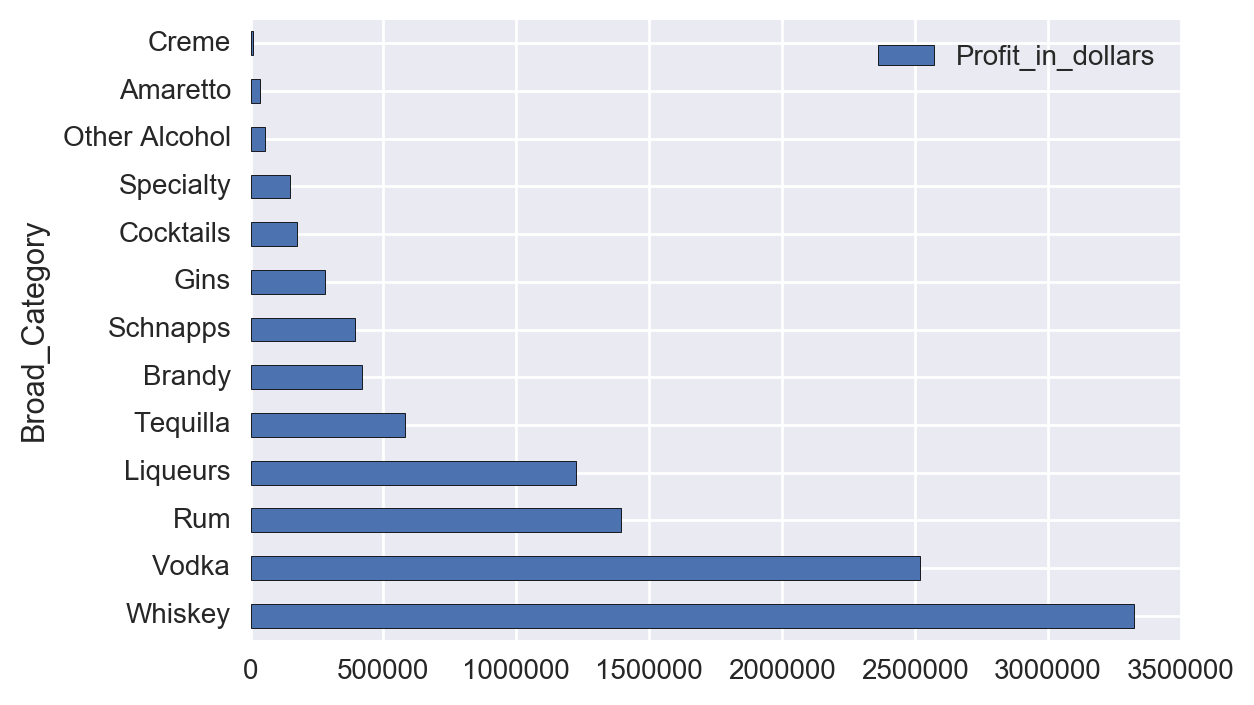

In [52]:
liquortype_vs_profit.plot(y = 'Profit_in_dollars',kind = 'barh')

#### The above plot shows the relationship between the broad Liquor category and Profit in dollars. For Whiskey and Vodka the profitability is very high compared to the rest of the items int he category.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 11. Proposing a new liquor tax

---

### The tax board wants to design a tax or taxes that affect larger stores more than smaller "mom and pop" stores.

Based on your investigations into the data, come up with a way you could design a tax that achieves this goal **without explicitly taxing stores based on size or county critera.** The liqour board does not want to obviously punish larger stores or speific counties for fear of backlash, but is willing to tax hard alcohol more than beer, for example.

Feel free to do more EDA if it helps.

Your report should describe whether such a tax is possible or not, and the specifics of what the tax will target/do.

In [53]:
tax_vs_profit = iowa_liquor_sale_ver1.groupby(['Broad_Category'])[['Sale (Dollars)','Cost_Price','Volume Sold (Gallons)']].agg(np.sum)
#tax_vs_profit = tax_vs_profit.reset_index()


In [54]:
tax_vs_profit['Profit_in_dollars'] = tax_vs_profit['Sale (Dollars)'] - tax_vs_profit['Cost_Price']
tax_vs_profit = tax_vs_profit.sort_values(by ='Profit_in_dollars', ascending = False)
tax_vs_profit

,Sale (Dollars),Cost_Price,Volume Sold (Gallons),Profit_in_dollars
Broad_Category,,,,
Whiskey,9.921297e+06,6.596000e+06,160074.33,3.325297e+06
Vodka,7.540712e+06,5.020618e+06,174906.27,2.520094e+06
Rum,4.176999e+06,2.782907e+06,79651.10,1.394092e+06
Liqueurs,3.665335e+06,2.442144e+06,49364.97,1.223192e+06
Tequilla,1.746428e+06,1.163658e+06,23074.84,5.827703e+05
Brandy,1.251751e+06,8.339842e+05,17461.23,4.177672e+05
Schnapps,1.181767e+06,7.877085e+05,24000.56,3.940582e+05
Gins,8.436298e+05,5.618615e+05,16740.51,2.817683e+05
Cocktails,5.179118e+05,3.436752e+05,19889.02,1.742366e+05


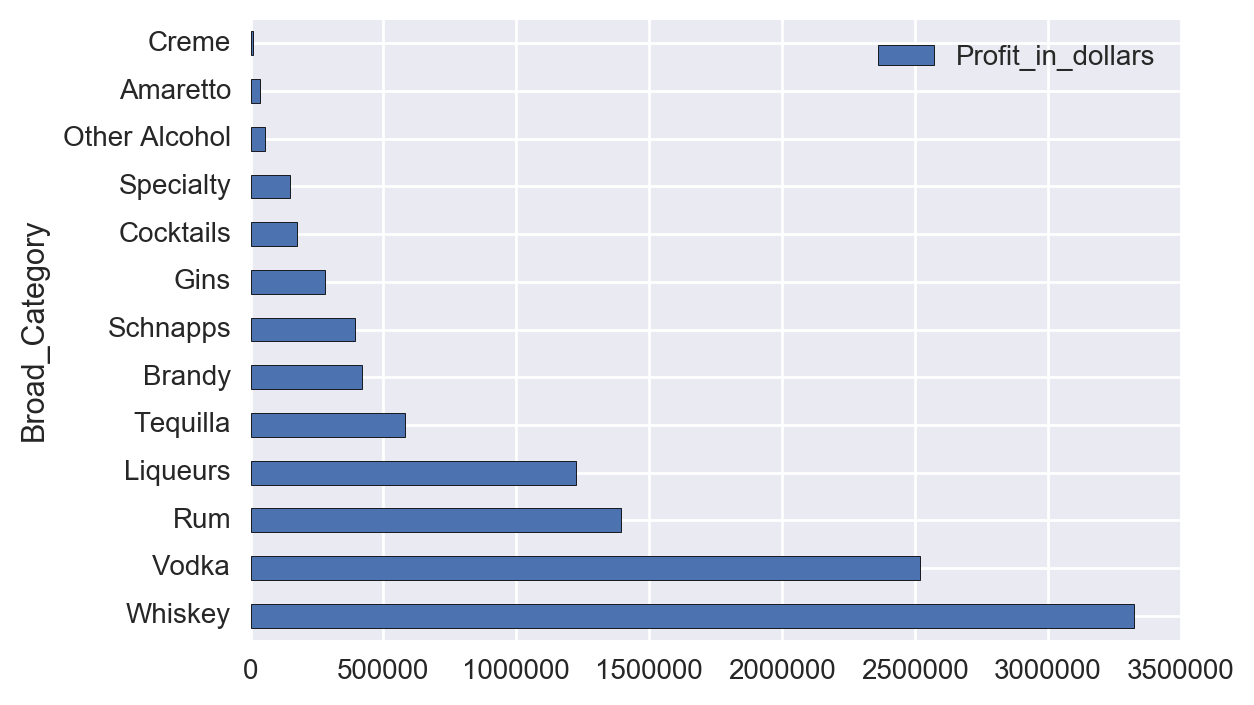

In [55]:
liquortype_vs_profit.plot(y = 'Profit_in_dollars',kind = 'barh')

#### The plot above shows the Broad_Category versus the profitability. Whiskey and Vodka are the winners.

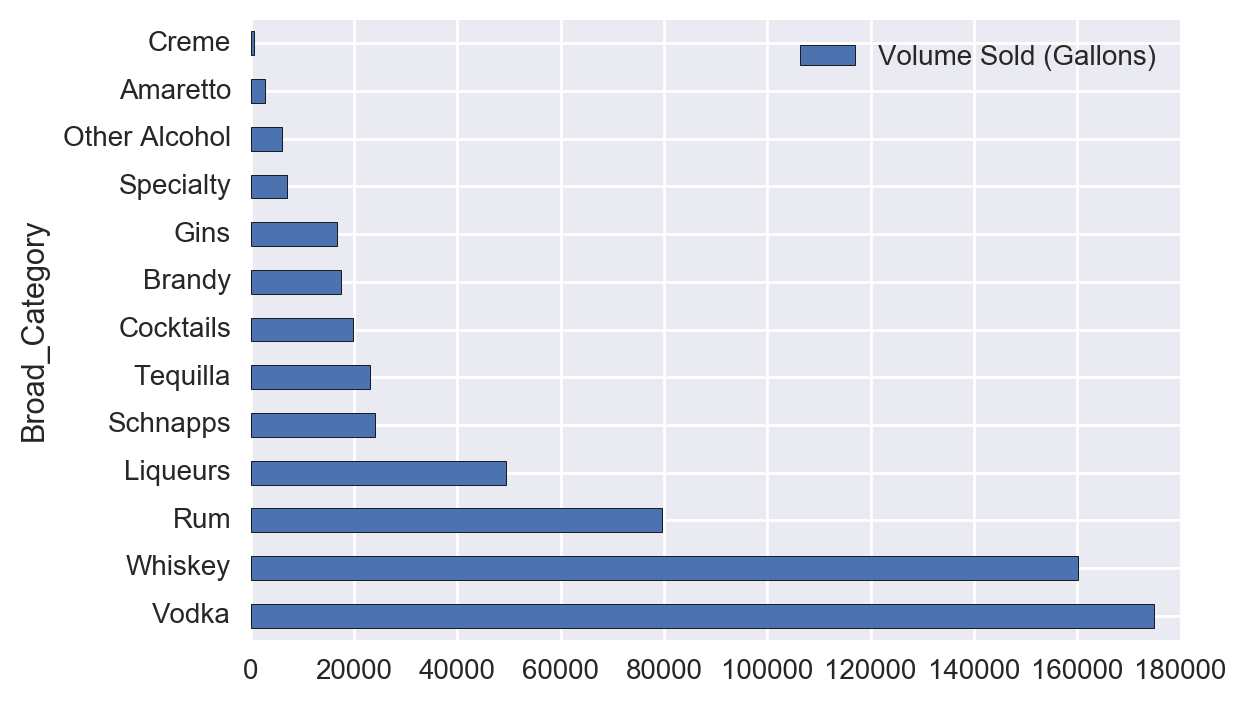

In [56]:
tax_vs_volume = tax_vs_profit.sort_values(by ='Volume Sold (Gallons)', ascending = False)
tax_vs_volume.plot(y = 'Volume Sold (Gallons)',kind = 'barh')



#### The plot above shows the Broad_Category versus the Volume Sold. Whiskey and Vodka are the winners again.

In [57]:
storenum_vs_volume = iowa_liquor_sale_ver1.groupby(['Store Number'])['Volume Sold (Gallons)'].agg(np.sum)
storenum_vs_volume = storenum_vs_volume.sort_values(ascending = False)
storenum_vs_volume = pd.DataFrame(storenum_vs_volume)



In [58]:
storenum_vs_volume = storenum_vs_volume.reset_index()
#storenum_vs_volume

In [59]:
storenum_vs_alcsold = iowa_liquor_sale_ver1.groupby(['Broad_Category','Store Number'])['Volume Sold (Gallons)'].agg(np.sum)
storenum_vs_alcsold = pd.DataFrame(storenum_vs_alcsold)
storenum_vs_alcsold = storenum_vs_alcsold.reset_index()


In [61]:
storenum_vs_whisold = storenum_vs_alcsold[storenum_vs_alcsold['Broad_Category']== 'Whiskey']
#storenum_vs_whisold
storenum_vs_vodsold = storenum_vs_alcsold[storenum_vs_alcsold['Broad_Category']== 'Vodka']
#storenum_vs_vodsold

In [62]:
tmp =(storenum_vs_volume).merge(storenum_vs_whisold, on = 'Store Number', how = 'outer',suffixes =('_total','_whiskey'))
tmp = tmp.merge(storenum_vs_vodsold, on = 'Store Number', how = 'outer',suffixes =('','_Vodka'))
tmp.rename(columns = {"Volume Sold (Gallons)_total":"Total Volume","Volume Sold (Gallons)":"Volume Sold (Gallons)_Vodka"}, inplace = True)


In [67]:
#The dataframe tmp has the total volume of liquor sold, volume of whiskey sold, volume of vodka sold and 
#volume of other liquors sold per store number.

tmp["Volume_Sold_otherAlcohols"]= tmp['Total Volume'] - (tmp['Volume Sold (Gallons)_whiskey'] + tmp['Volume Sold (Gallons)_Vodka'])
tmp

,Store Number,Total Volume,Broad_Category,Volume Sold (Gallons)_whiskey,Broad_Category_Vodka,Volume Sold (Gallons)_Vodka,Volume_Sold_otherAlcohols
0,2633,20057.78,Whiskey,2845.31,Vodka,5266.60,11945.87
1,4829,16772.70,Whiskey,3069.83,Vodka,5080.57,8622.30
2,3385,9571.80,Whiskey,2294.75,Vodka,2403.37,4873.68
3,2512,8823.47,Whiskey,2106.33,Vodka,2640.36,4076.78
4,3420,7570.33,Whiskey,2085.17,Vodka,1813.72,3671.44
5,3952,5745.27,Whiskey,1186.26,Vodka,1228.47,3330.54
6,3354,5621.65,Whiskey,1922.89,Vodka,1249.06,2449.70
7,3447,4821.67,Whiskey,1946.04,Vodka,890.42,1985.21
8,2670,4585.03,Whiskey,1012.71,Vodka,1317.00,2255.32
9,3814,4293.54,Whiskey,2088.32,Vodka,1034.25,1170.97


In [66]:
tmp_top = tmp.head(10)
tmp_bottom = tmp.tail(10)

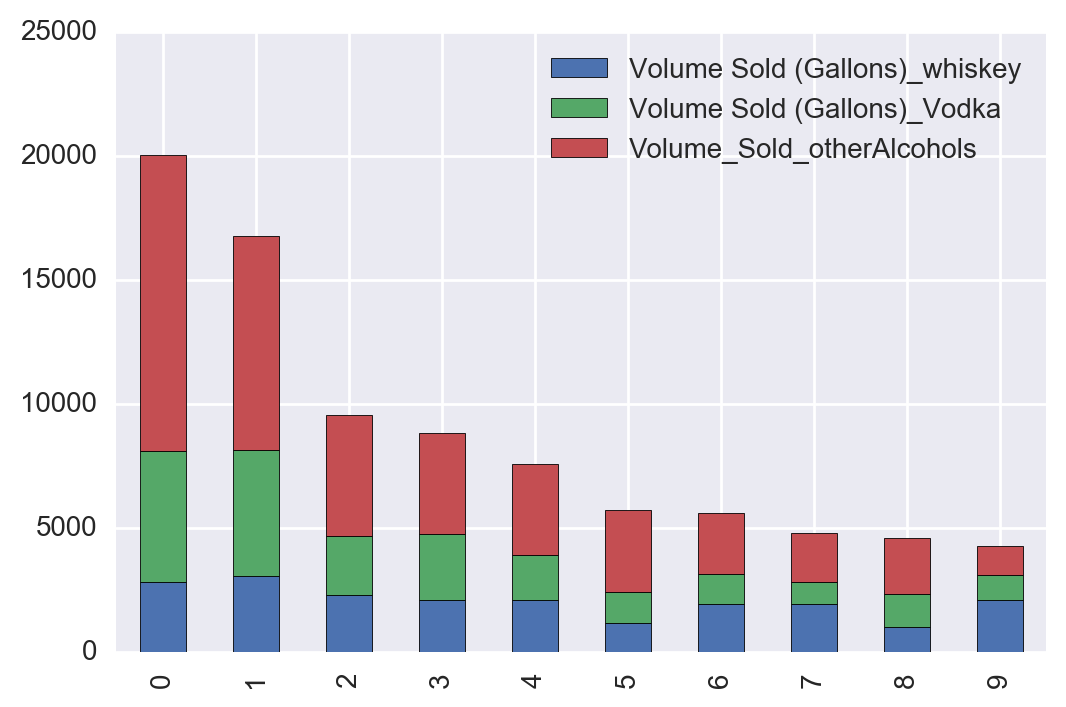

In [64]:
tmp_top[['Volume Sold (Gallons)_whiskey','Volume Sold (Gallons)_Vodka',"Volume_Sold_otherAlcohols"]].plot(kind='bar', stacked=True)


### The Stacked plot above shows the stacked histograms for top 10 stores. The volume of hard liquor sold is in 1000's of gallons for these stores when specifically compared to bottom 10 stores as plotted below.

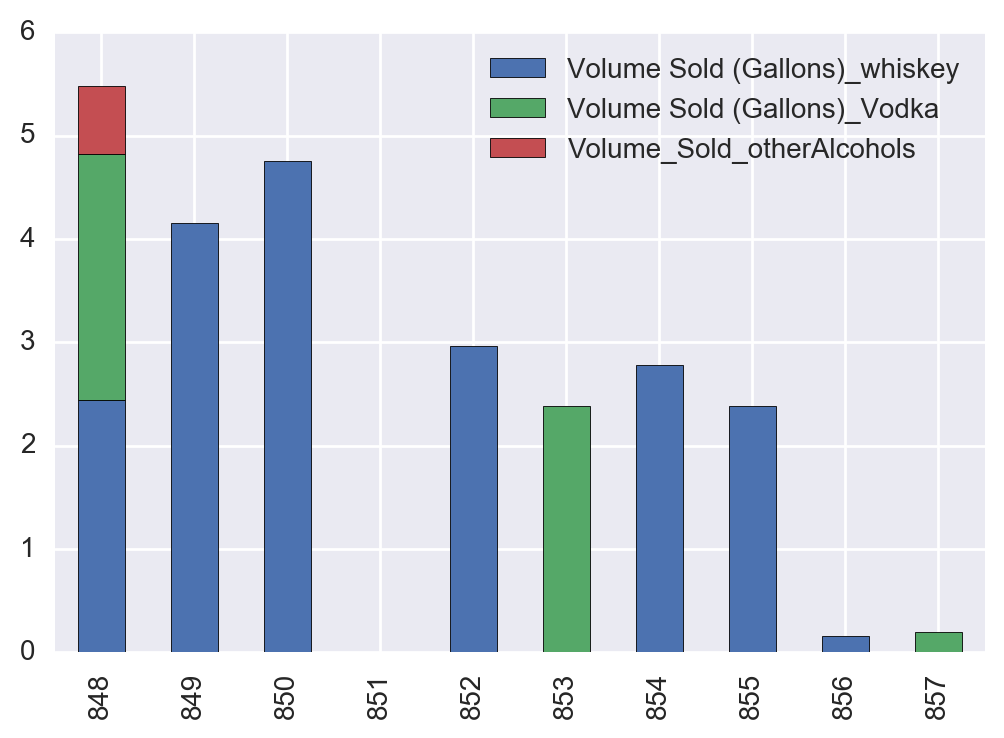

In [65]:
tmp_bottom[['Volume Sold (Gallons)_whiskey','Volume Sold (Gallons)_Vodka',"Volume_Sold_otherAlcohols"]].plot(kind='bar', stacked=True)

### Bog box stores have higher volume sale of hard liquor such as Whiskey and Vodka. The profit and volume sold for whiskey and vodka is also maximum compared to other alcoholic beverages. Therefore the profit margins accrued on the sale of whiskey and vodka in general would be much higher.

### If the taxation is based on profit margin accrued instead of volume then that would seem fair for everyone involved.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 12. Time-related effects

---

You could imagine that liquor sales might be affected by a variety of effects related to time. Do people buy more beer in the summer? Do liquor sales skyrocket in december? Do people buy less liquor on Tuesdays?

You have the date of sales in your dataset, which you can use to pull out time components.

1. Come up with 2 different hypotheses about how liquor sales may vary with time-related variables. 
2. Create a visualization exploring each hypothesis.
3. Write brief concluding remarks on what you observed.


In [68]:
iowa_liquor_sale_ver1.head()

,index,Date,Store Number,Sale_Month,Sale_Year,City,Zip Code,County Number,County,Category,...,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Cost_Price,Broad_Category
0,0,2015-11-04,3717,11,2015,Sumner,50674,9.0,Bremer,1051100.0,...,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.0,2.38,54.00,Brandy
1,1,2016-03-02,2614,3,2016,Davenport,52807,82.0,Scott,1011100.0,...,Tin Cup,750,13.75,20.63,2,41.26,1.5,0.40,27.50,Whiskey
2,2,2016-02-11,2106,2,2016,Cedar falls,50613,7.0,Black Hawk,1011200.0,...,Jim Beam,1000,12.59,18.89,24,453.36,24.0,6.34,302.16,Whiskey
3,3,2016-02-03,2501,2,2016,Ames,50010,85.0,Story,1071100.0,...,1800 Ultimate Margarita,1750,9.50,14.25,6,85.50,10.5,2.77,57.00,Cocktails
4,4,2015-08-18,3654,8,2015,Belmond,50421,99.0,Wright,1031080.0,...,Five O'clock Vodka,1750,7.20,10.80,12,129.60,21.0,5.55,86.40,Vodka


In [69]:
iowa_liquor_sale_ver3 = iowa_liquor_sale_ver1.copy(deep=True)
iowa_liquor_sale_ver3.insert(3,'Sale_Day',iowa_liquor_sale_ver3['Date'].map(lambda x:x.day))
iowa_liquor_sale_ver3.head()


,index,Date,Store Number,Sale_Day,Sale_Month,Sale_Year,City,Zip Code,County Number,County,...,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Cost_Price,Broad_Category
0,0,2015-11-04,3717,4,11,2015,Sumner,50674,9.0,Bremer,...,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.0,2.38,54.00,Brandy
1,1,2016-03-02,2614,2,3,2016,Davenport,52807,82.0,Scott,...,Tin Cup,750,13.75,20.63,2,41.26,1.5,0.40,27.50,Whiskey
2,2,2016-02-11,2106,11,2,2016,Cedar falls,50613,7.0,Black Hawk,...,Jim Beam,1000,12.59,18.89,24,453.36,24.0,6.34,302.16,Whiskey
3,3,2016-02-03,2501,3,2,2016,Ames,50010,85.0,Story,...,1800 Ultimate Margarita,1750,9.50,14.25,6,85.50,10.5,2.77,57.00,Cocktails
4,4,2015-08-18,3654,18,8,2015,Belmond,50421,99.0,Wright,...,Five O'clock Vodka,1750,7.20,10.80,12,129.60,21.0,5.55,86.40,Vodka


In [70]:
liquorsale_vs_time = iowa_liquor_sale_ver3.groupby(['Sale_Year','Sale_Month','Sale_Day'])[['Sale (Dollars)','Volume Sold (Gallons)']].agg(np.sum)
liquorsale_vs_time = liquorsale_vs_time.sort_values(by ='Sale (Dollars)', ascending = False)


In [71]:
liquorsale_vs_time = liquorsale_vs_time.reset_index()
liquorsale_vs_time.head()

,Sale_Year,Sale_Month,Sale_Day,Sale (Dollars),Volume Sold (Gallons)
0,2015,10,1,247995.63,3757.49
1,2015,10,12,222066.98,3447.46
2,2015,6,16,219989.73,3948.12
3,2015,12,14,212968.93,3515.07
4,2015,11,18,211727.75,3307.55


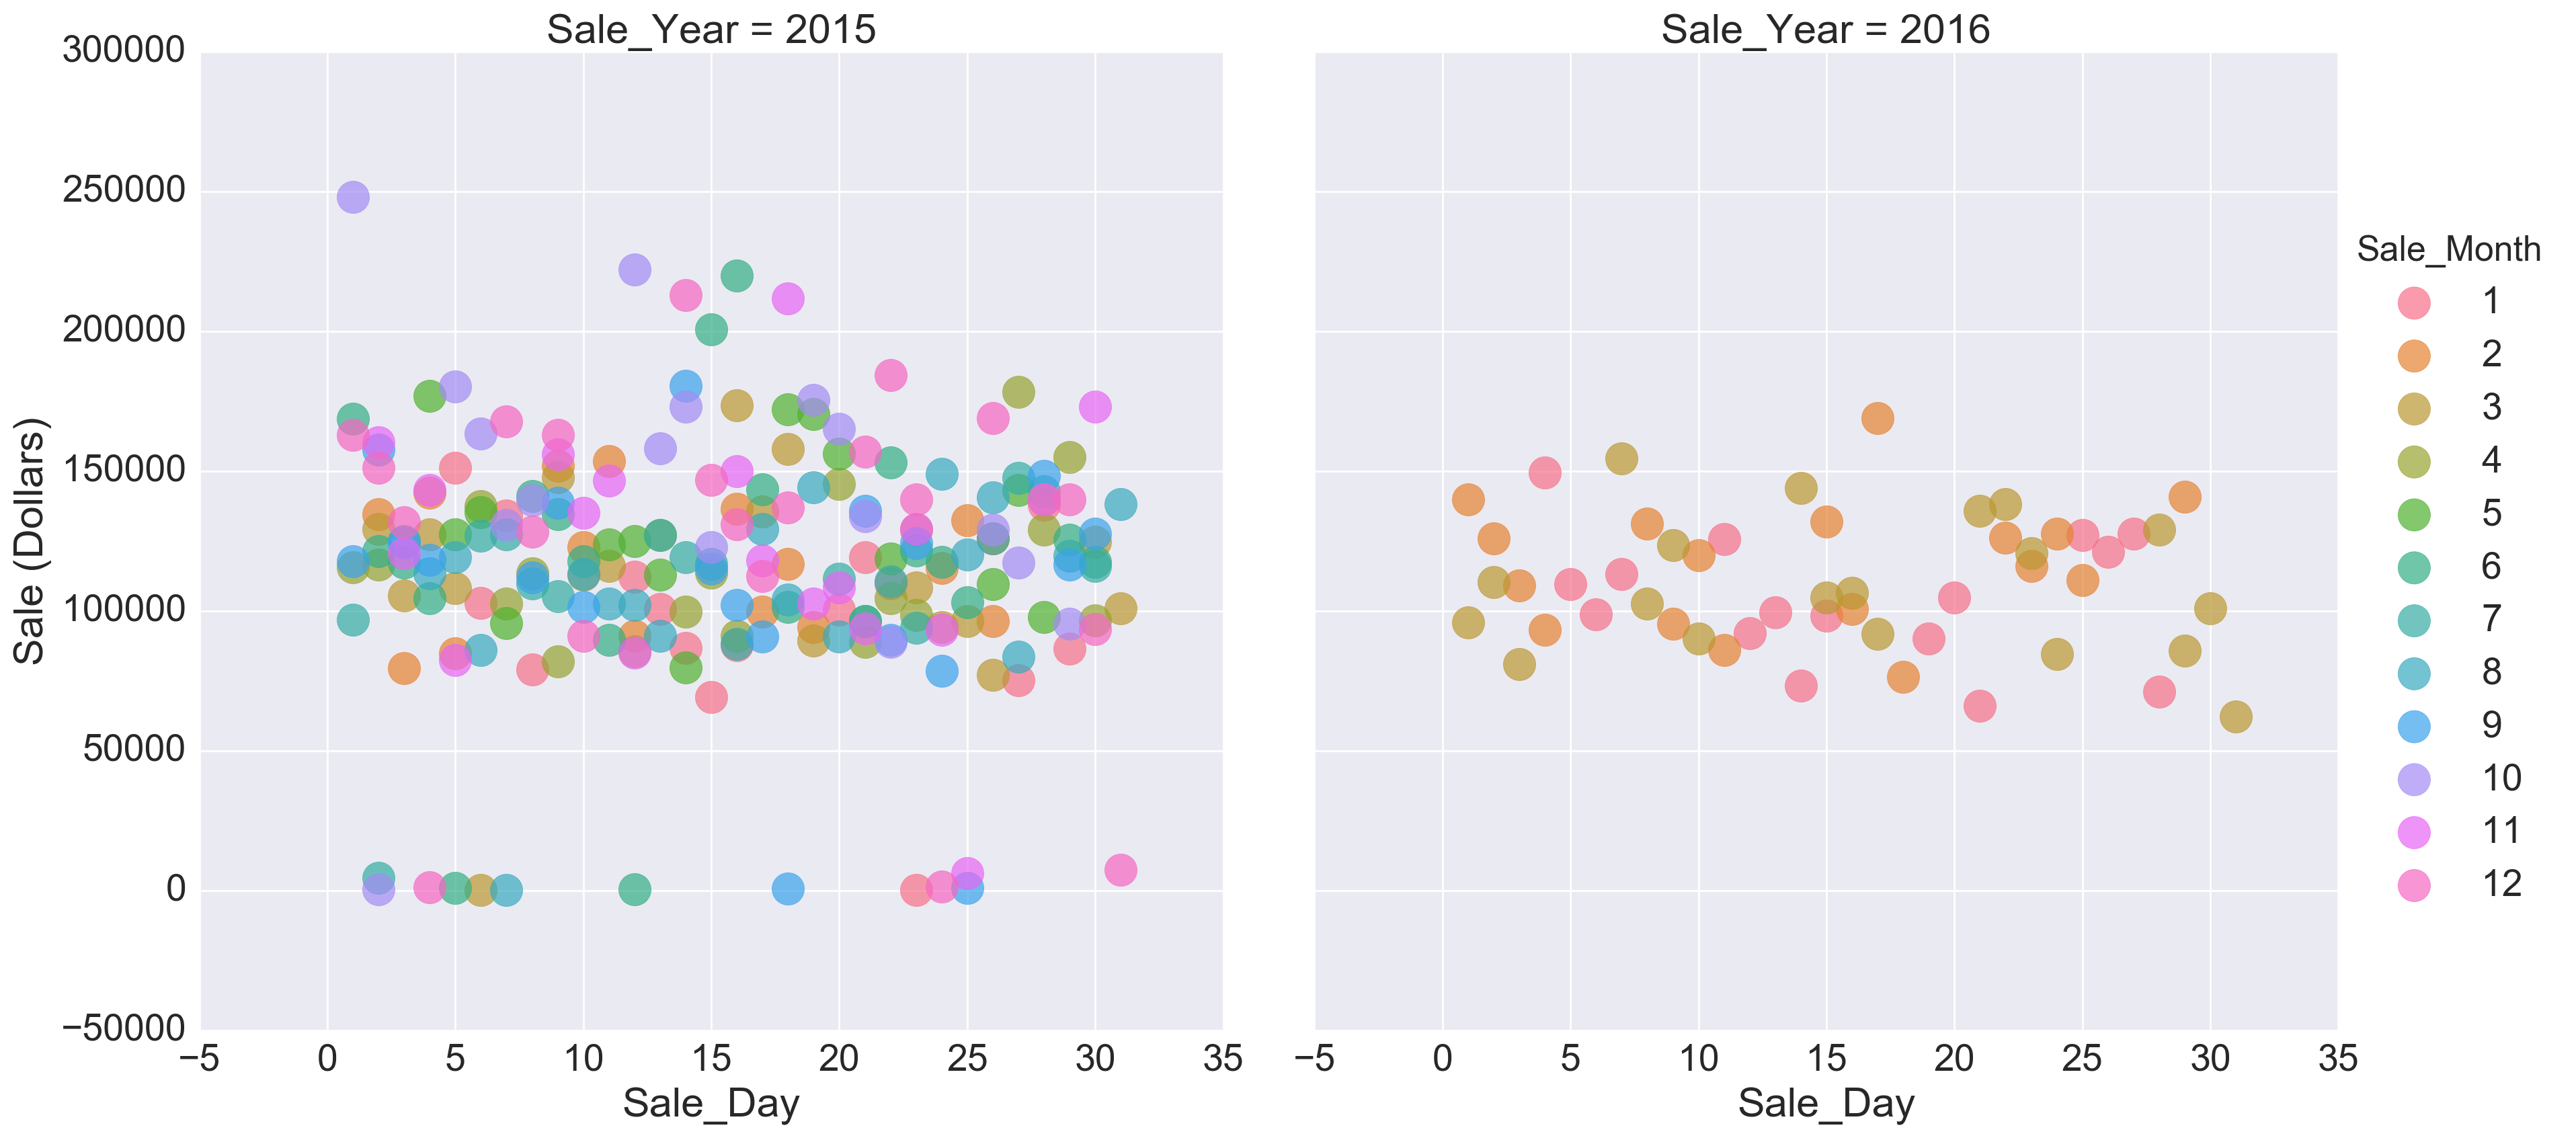

In [72]:
sns.set(font_scale = 2)
f = sns.FacetGrid(liquorsale_vs_time, col='Sale_Year',hue = 'Sale_Month', size = 9)
f.map(plt.scatter, "Sale_Day", "Sale (Dollars)", alpha =0.7, s= 300)
f.add_legend()



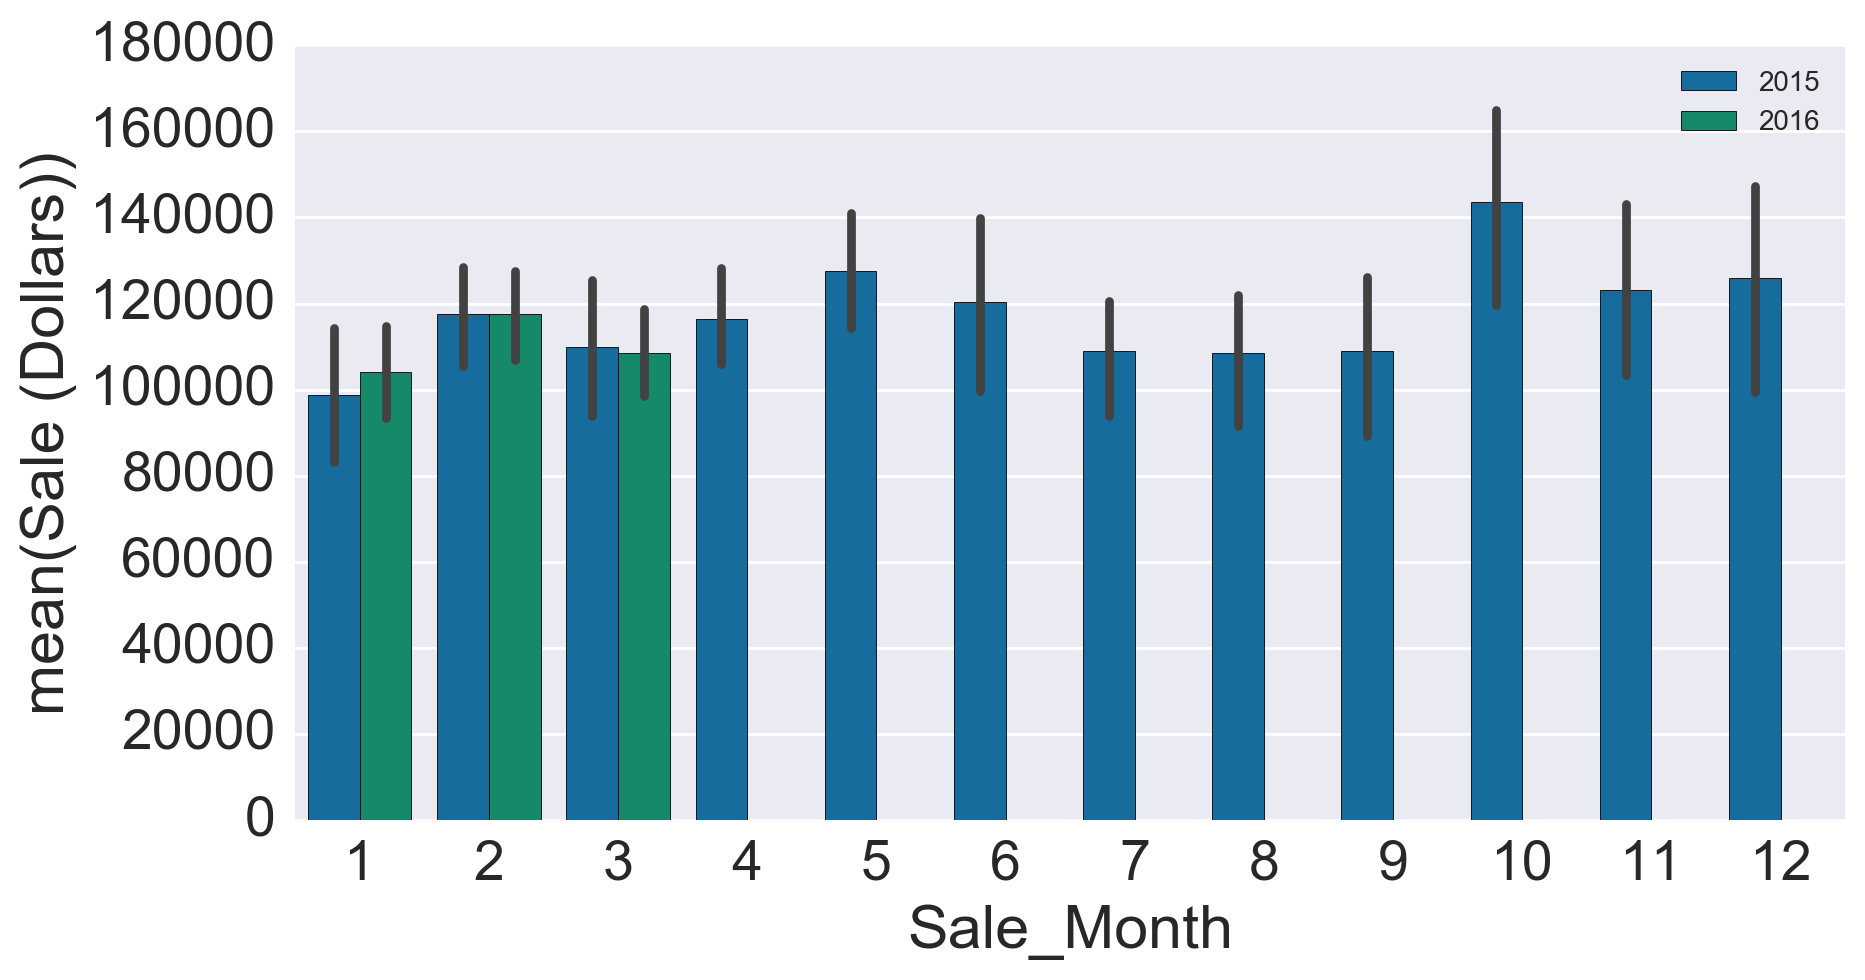

In [73]:
fig, ax= plt.subplots(1,1, figsize=(10,5))
sns.set(font_scale = 1)

sns.barplot(data=liquorsale_vs_time, x='Sale_Month',y ='Sale (Dollars)',hue='Sale_Year',palette =sns.color_palette("colorblind", 2),ax=ax)
ax.legend(loc='upper right')

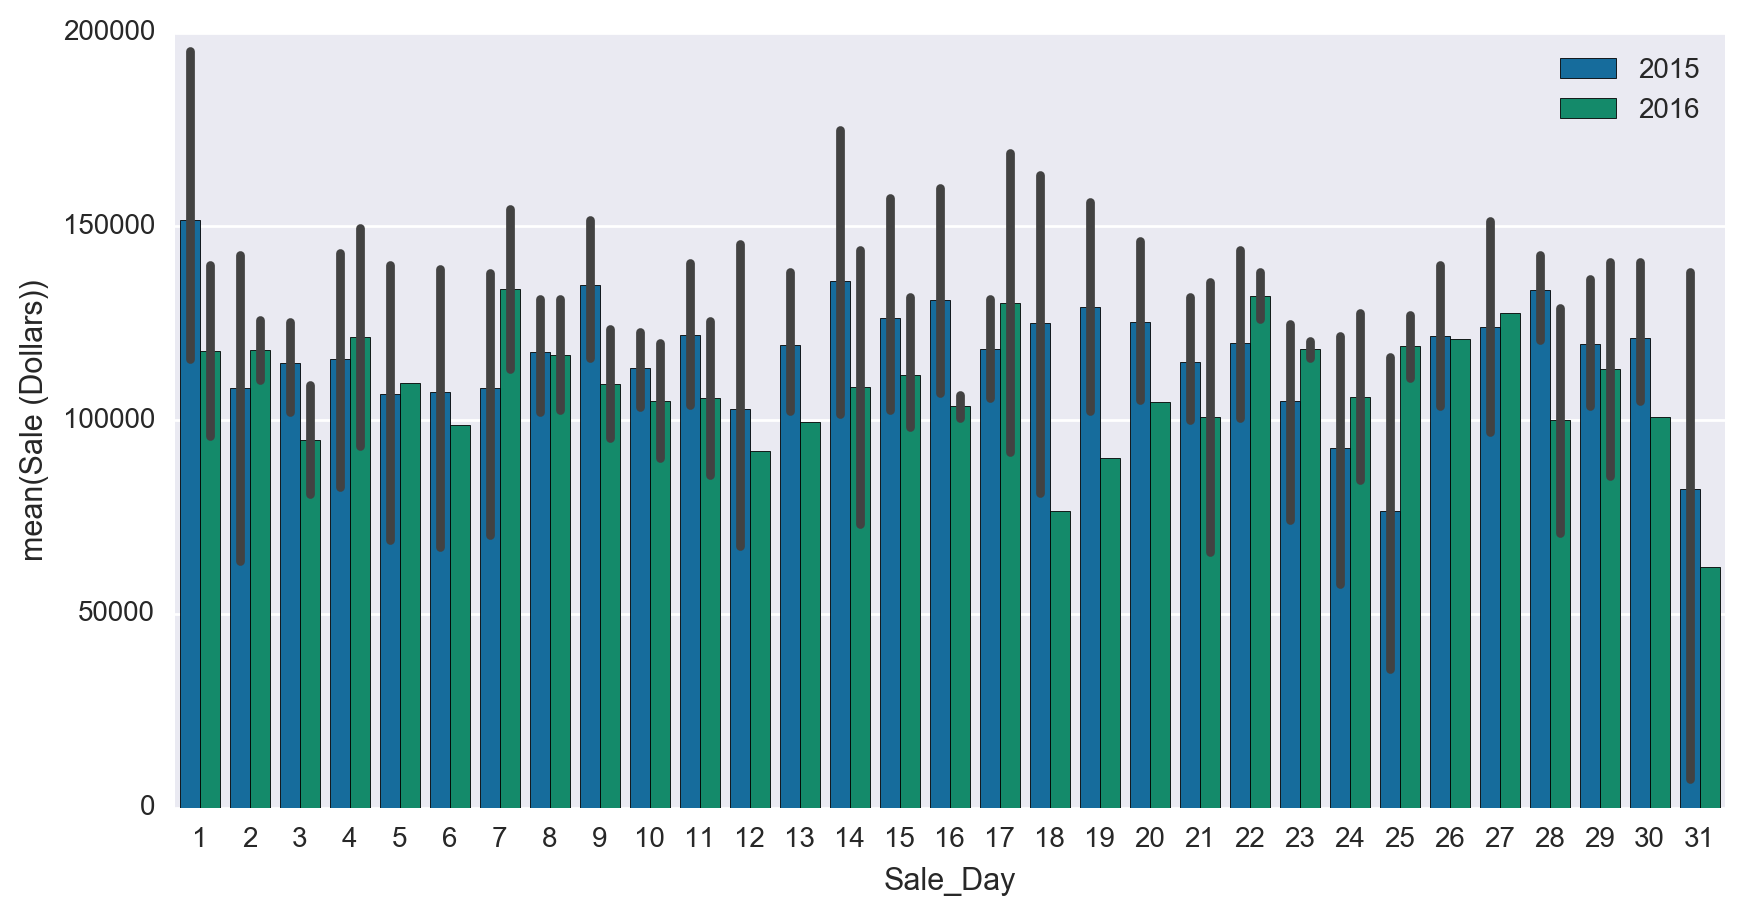

In [74]:
sns.set(font_scale = 1)

fig, ax= plt.subplots(1,1, figsize=(10,5))

sns.barplot(data=liquorsale_vs_time, x='Sale_Day',y ='Sale (Dollars)',hue='Sale_Year',palette =sns.color_palette("colorblind",2),ax=ax)
ax.legend(loc='upper right')

#### The above plot Sale in dollars vs Sale_Day shows greater sales over weekends and in the beginning of the month compared to weekdays and end of the month. 

#### The last quarter of the year(Oct-Dec) has significantly higher sales compared to rest of the year. This quarter has Thanksgiving and Christmas holidays when people tend to celebrate and drink more. The spike in the month of October could also sifnigy that people are buying liquor as gifts during the holiday season.

#### Summer months of May and June come close second. Memorial Day which is officically a holiday on the USA falls in May and may accoutn for the high sales. People tend to take off in summer and enjoy so that could accoutnf or higher sale in June.